In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

# importing libraries  

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn import tree
from ipykernel import kernelapp as app
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams

#  Data Importing

In [ ]:
#loading the csv
df=pd.read_csv("/content/AgrcultureDataset.csv",encoding = "ISO-8859-1")
df.dtypes

Farmer_Name       object
District_Name     object
Survey_Number     object
Area             float64
Crop_Year          int64
Season            object
Crop              object
Production        object
Income             int64
Expense            int64
Profit             int64
Debt               int64
dtype: object

# Data preparation and encoding

In [ ]:
#indian agricultural production dataset
df.head()

,Farmer_Name,District_Name,Survey_Number,Area,Crop_Year,Season,Crop,Production,Income,Expense,Profit,Debt
0,Ali,NICOBARS,K66C72,1254.0,2020,Kharif,Arecanut,2000,43362,37764,-5598,3412
1,Ali,NICOBARS,N80M81,2.0,2020,Kharif,Other Kharif pulses,1,58126,48135,-9991,6529
2,Ali,NICOBARS,N71L69,102.0,2020,Kharif,Rice,321,99798,88054,-11744,3429
3,Ali,NICOBARS,I84E78,176.0,2020,Whole Year,Banana,641,84869,40047,-44822,1789
4,Ali,NICOBARS,U88D75,720.0,2020,Whole Year,Cashewnut,165,8642,57520,48878,8255


In [ ]:
df['Profit'] = pd.to_numeric(df['Profit'], errors = 'coerce')

In [ ]:
dataBySeason = df.groupby(['Season'])[['Profit']].mean()

In [ ]:
sorteddataBySeason = dataBySeason.sort_values(by='Profit', ascending=False)
sorteddataBySeason

,Profit
Season,
Autumn,-1272.178218
Winter,-1889.903433
Summer,-2228.455832
Rabi,-2383.375819
Kharif,-2481.808277
Whole Year,-2654.215217


In [ ]:
# Group the data by 'Crop_Year' and 'Season' and calculate the sum of 'Profit' for each group
yearly_seasonal_profits = df.groupby(['Crop_Year', 'Season'])['Profit'].sum().reset_index()

In [ ]:
# Create a pivot table to arrange the data for visualization
pivot_table = yearly_seasonal_profits.pivot(index='Crop_Year', columns='Season', values='Profit')

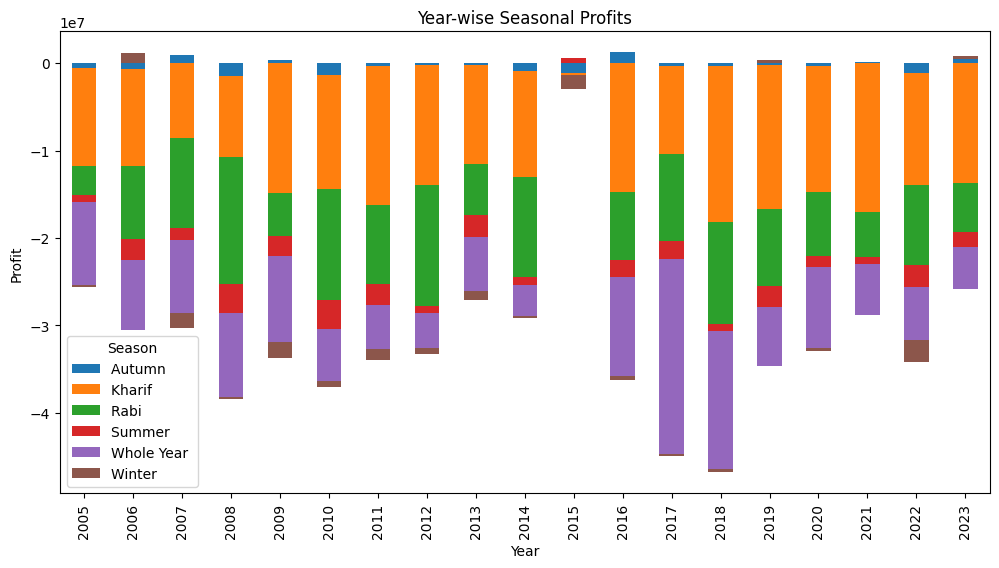

In [ ]:
# Plot the data as a bar chart
pivot_table.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Year-wise Seasonal Profits')
plt.xlabel('Year')
plt.ylabel('Profit')
plt.legend(title='Season')
plt.show()

WORK # 01: Show the profit gained each year in a particular area.

In [ ]:
df['Profit'] = pd.to_numeric(df['Profit'], errors = 'coerce')

In [ ]:
data = df.groupby(['Crop_Year'])[['Area', 'Profit']].mean()

In [ ]:
sorted_data = data.sort_values(by='Profit', ascending=False)
sorted_data

,Area,Profit
Crop_Year,,
2005,11822.333236,-1855.972027
2013,10368.125223,-1980.519048
2007,10513.848637,-2025.207697
2006,11913.672644,-2054.221106
2021,12678.074790,-2287.157571
2009,11738.077997,-2361.524228
2011,10918.140920,-2409.953450
2020,12102.612169,-2410.209621
2016,11891.933465,-2479.543387


import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(sorted_data, *['Area'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(sorted_data, *['Profit'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plot(df, x_colname, y_colname, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(6 * figscale, 6 * figscale))
  df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha)
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plot(sorted_data, *['Area', 'Profit'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(sorted_data, *['Area'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(sorted_data, *['Profit'], **{})
chart

*Work* # 02: Profits Gained by every crops. Show top profits gained by crops.

In [ ]:
df['Profit'] = pd.to_numeric(df['Profit'], errors = 'coerce')

In [ ]:
data1 = df.groupby(['Crop'])[['Profit']].mean()

In [ ]:
sorted_data1 = data1.sort_values(by='Profit', ascending=False)
sorted_data1

,Profit
Crop,
Peach,31068.750000
Ricebean (nagadal),26493.100000
Apple,15134.500000
Arcanut (Processed),13287.150000
Cashewnut Processed,13030.142857
...,...
Pear,-16105.500000
Rajmash Kholar,-17685.055556
Perilla,-22615.555556


Work # 03: which farmer has the most debt at the moment?

In [ ]:
farmer_debt = df.groupby('Farmer_Name')['Debt'].sum().reset_index()

In [ ]:
sorted_farmer_debt = farmer_debt.sort_values(by='Debt', ascending=False)
sorted_farmer_debt

,Farmer_Name,Debt
30,Uttar Pradesh,174919718
16,Madhya Pradesh,120858798
14,Karnataka,111268407
4,Bihar,99292661
3,Assam,76392235
27,Tamil Nadu,71164407
22,Odisha,70943574
17,Maharashtra,66640832
25,Rajasthan,65915033
9,Hamid,56583882


Work # 04: which farmer has the most contracts?

In [ ]:
name_counts = df['Farmer_Name'].value_counts().reset_index()
name_counts.columns = ['Farmer_Name', 'Total_Contracts']

In [ ]:
name_counts

,Farmer_Name,Total_Contracts
0,Uttar Pradesh,33306
1,Madhya Pradesh,22943
2,Karnataka,21122
3,Bihar,18885
4,Assam,14628
5,Odisha,13575
6,Tamil Nadu,13547
7,Maharashtra,12628
8,Rajasthan,12514
9,Hamid,10709


Work # 05: Which district generates the most profit?

In [ ]:
df['Profit'] = pd.to_numeric(df['Profit'], errors = 'coerce')

In [ ]:
district_data = df.groupby(['District_Name'])[['Profit']].mean()

In [ ]:
sorted_district_data = district_data.sort_values(by='Profit', ascending=False)
sorted_district_data

,Profit
District_Name,
HYDERABAD,31595.500000
NAMSAI,24660.000000
SHOPIAN,11219.000000
SARAIKELA KHARSAWAN,9735.857143
KHUNTI,8937.166667
...,...
DEOGHAR,-11442.700000
UNAKOTI,-13518.596774
N&MA,-16410.720000


Work # 06: What farmer generates the most profit?

In [ ]:
df['Profit'] = pd.to_numeric(df['Profit'], errors = 'coerce')

In [ ]:
farmer_profit = df.groupby(['Farmer_Name'])[['Profit']].mean()

In [ ]:
sorted_farmer_profit = farmer_profit.sort_values(by='Profit', ascending=False)
sorted_farmer_profit

,Profit
Farmer_Name,
Dadra and Nagar Haveli,138.566540
Mizoram,-731.367816
James,-789.848837
Jharkhand,-1200.895735
Haryana,-1581.285106
Odisha,-1680.918895
Uttarakhand,-2050.644812
Nagaland,-2152.632616
Tamil Nadu,-2245.105411


Work # 07: Expenses of different farmers growing the same crop in a given survey no? area-to-expense ratio

In [ ]:
crop_name = 'Coffee'
filtered_data = df[df['Crop'] == crop_name]

# Group the filtered data by Survey_Number and calculate the total expense and total area
grouped_data = filtered_data.groupby('Survey_Number').agg({'Expense': 'sum', 'Area': 'sum'})

# Calculate the area-to-expense ratio
grouped_data['Area_to_Expense_Ratio'] = grouped_data['Area'] / grouped_data['Expense']

sorted_grouped_data = grouped_data.sort_values(by='Area_to_Expense_Ratio', ascending=False)
sorted_grouped_data

,Expense,Area,Area_to_Expense_Ratio
Survey_Number,,,
I77W75,50274,67510.0,1.342841
K65P66,60015,66973.0,1.115938
R67U87,12188,12635.0,1.036675
O73N84,14685,4650.0,0.316650
M69W88,41261,11490.0,0.278471
L67K78,18401,4650.0,0.252704


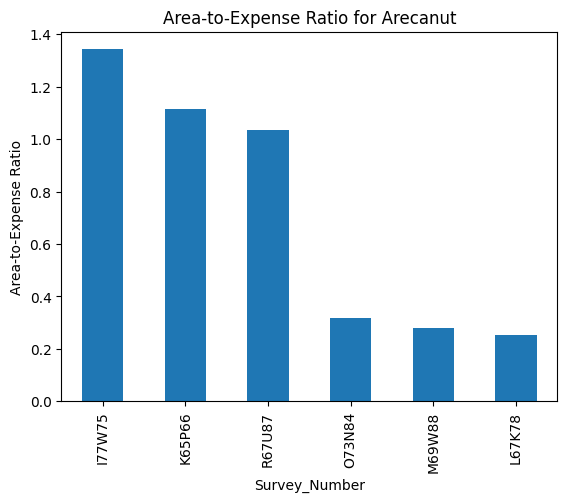

In [ ]:
# 1. Bar Chart to represent this
sorted_grouped_data['Area_to_Expense_Ratio'].plot(kind='bar')
plt.xlabel('Survey_Number')
plt.ylabel('Area-to-Expense Ratio')
plt.title('Area-to-Expense Ratio for Arecanut')
plt.show()

# Descriptive analysis

In [ ]:
df.describe()

,Area,Crop_Year,Income,Expense,Profit,Debt
count,2.460910e+05,246091.000000,246091.000000,246091.000000,246091.000000,246091.000000
mean,1.200282e+04,2013.669773,54887.868240,52446.882820,-2440.985420,5260.179088
std,5.052340e+04,5.480877,28748.300317,27414.582444,39716.440934,2744.316078
min,4.000000e-02,2005.000000,5000.000000,5000.000000,-99268.000000,500.000000
25%,8.000000e+01,2009.000000,30056.500000,28745.500000,-30937.000000,2881.000000
50%,5.820000e+02,2013.000000,54980.000000,52426.000000,-2445.000000,5277.000000
75%,4.392000e+03,2018.000000,79846.500000,76172.000000,25953.500000,7639.000000
max,8.580100e+06,2023.000000,104499.000000,99999.000000,94521.000000,9999.000000


# Box plots

<Axes: xlabel='Area_to_Expense_Ratio'>

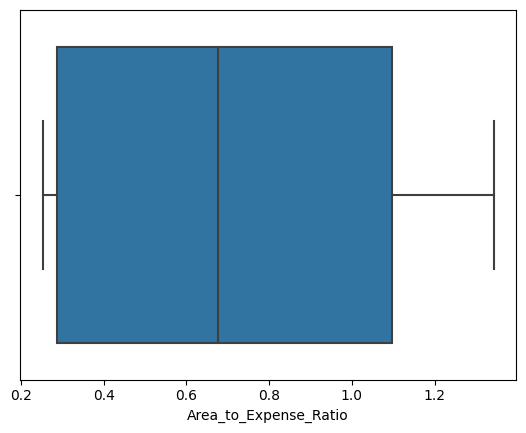

In [ ]:
#boxplot plotting
import seaborn as sns
sns.boxplot(x=sorted_grouped_data['Area_to_Expense_Ratio'])

In [ ]:
data = data[np.isfinite(data['CPI'])]
data=data[data.CPI >43]
data=data[data.CPI <51]
data.set_index('Crop_Year')
data

KeyError: ignored

# plotting histogram

array([[<Axes: title={'center': 'Crop_Year'}>,
        <Axes: title={'center': 'Area'}>],
       [<Axes: title={'center': 'Production'}>,
        <Axes: title={'center': 'CPI'}>]], dtype=object)

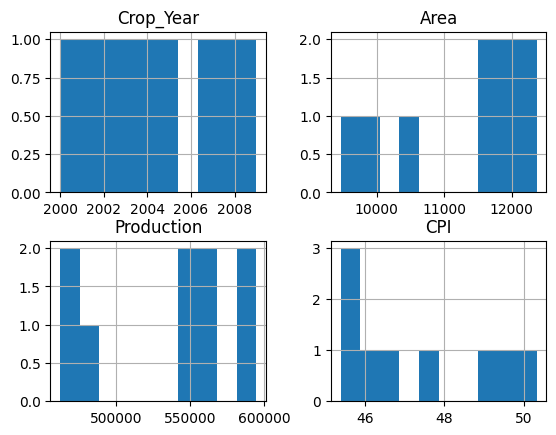

In [ ]:
#plotting histogram
data.hist()

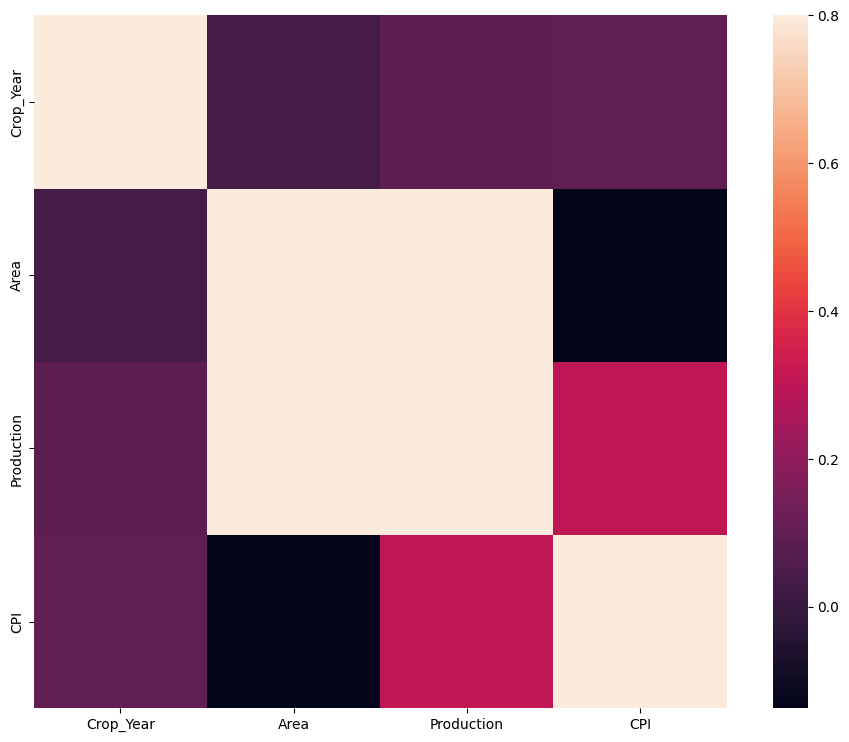

In [ ]:
corrmat = data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

# Scatter plots

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


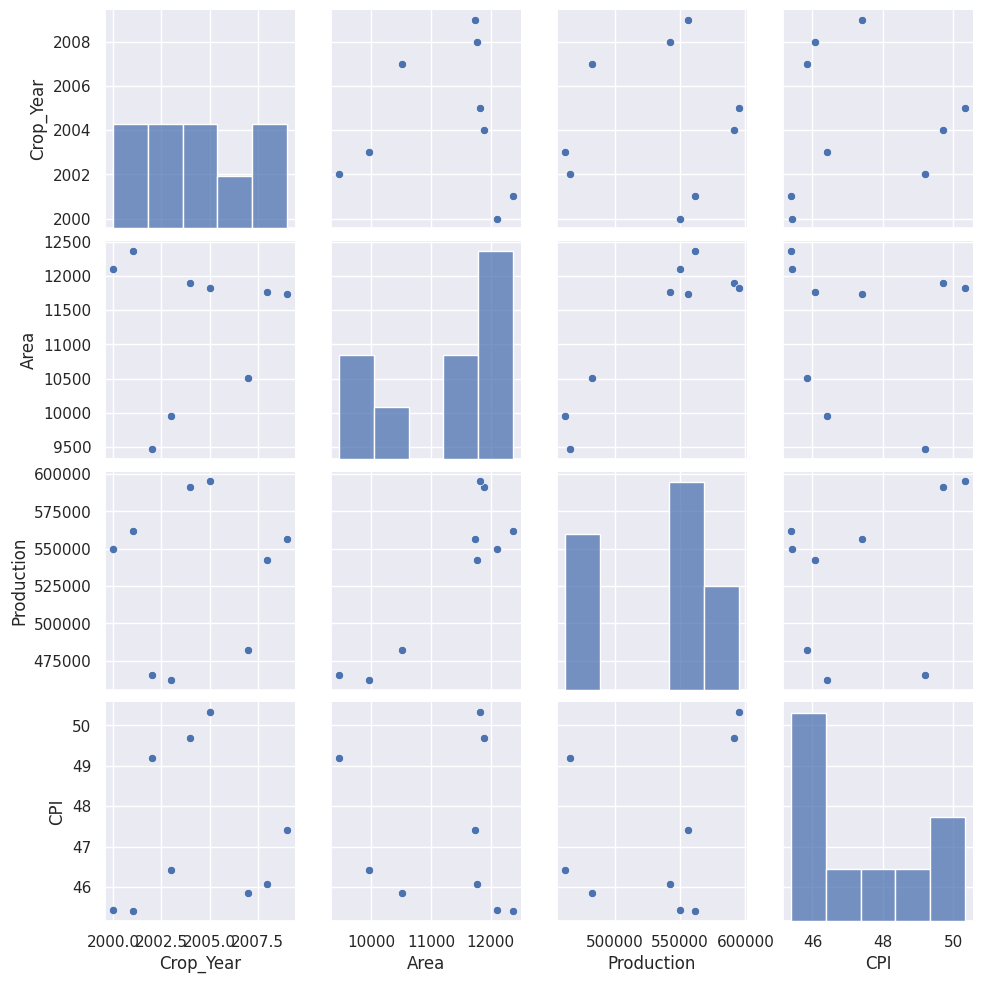

In [ ]:
#scatterplot
sns.set()
cols = ['Crop_Year', 'Area', 'Production', 'CPI']
sns.pairplot(data[cols], size = 2.5)
plt.show();

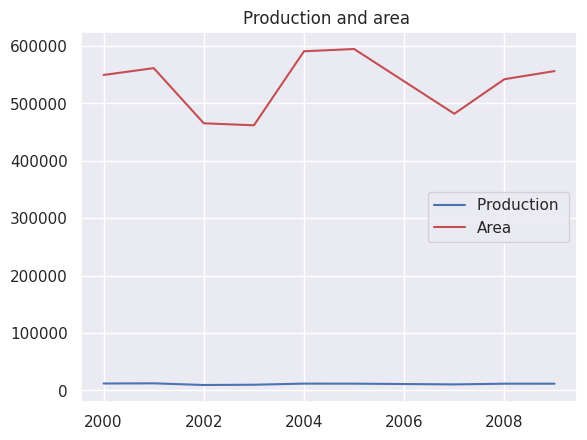

In [ ]:
#comparison of production and area for each year
x_axis=data.Crop_Year
y_axis=data.Area

y1_axis=data.Production

plt.plot(x_axis,y_axis)
plt.plot(x_axis,y1_axis,color='r')

plt.title("Production and area ")
plt.legend(["Production ","Area"])
plt.show()

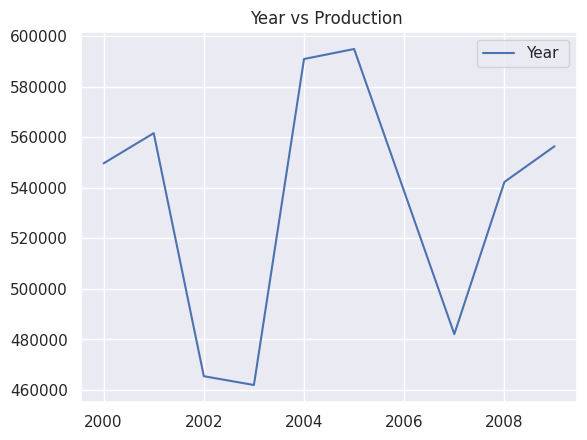

In [ ]:
#plotting of production
x_axis=data.Crop_Year
y1_axis=data.Production



plt.plot(x_axis,y1_axis)

plt.title("Year vs Production ")
plt.legend(["Year ","Production"])
plt.show()

# Applying random forest

In [ ]:
#importing random forest regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
# from sklearn.cross_validation import train_test_split

In [ ]:
#splitting and fitting of the model
x=data.iloc[:,0:1].values
y=data.iloc[:,3].values
regressor=RandomForestRegressor(n_estimators=12,random_state=0,n_jobs=1,verbose=13)

regressor.fit(x,y)

building tree 1 of 12
building tree 2 of 12
building tree 3 of 12
building tree 4 of 12
building tree 5 of 12
building tree 6 of 12
building tree 7 of 12
building tree 8 of 12
building tree 9 of 12
building tree 10 of 12
building tree 11 of 12
building tree 12 of 12


[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  11 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  12 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  12 tasks      | elapsed:    0.0s


RandomForestRegressor(n_estimators=12, n_jobs=1, random_state=0, verbose=13)

In [ ]:
#predicting for the test values
y_pred=regressor.predict(x)
y_pred

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  11 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  12 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  12 tasks      | elapsed:    0.0s


array([45.726107  , 45.71519001, 48.00600917, 47.33382739, 48.92472398,
       49.51196079, 46.71271891, 46.54466636, 47.0961381 ])

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  11 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  12 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  12 tasks      | elapsed:    0.0s


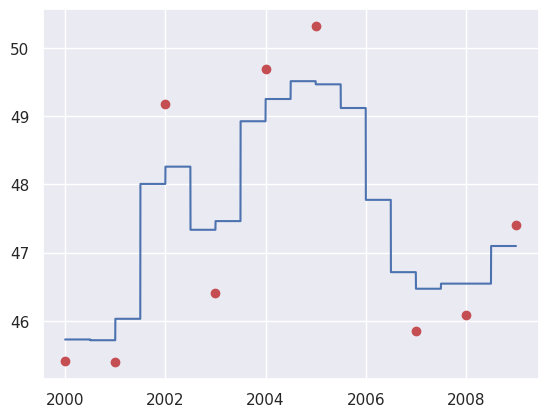

In [ ]:
#random forest steps plotting
x_grid=np.arange(min(x),max(x),0.001)
x_grid=x_grid.reshape(len(x_grid),1)
plt.scatter(x,y,color='r')
plt.plot(x_grid,regressor.predict(x_grid),color='b')
a=plt.show()
a


#  DENSITY PLOTS

<ipython-input-19-403b3a16cd34>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['CPI'], hist=True, kde=True,


<Axes: xlabel='CPI', ylabel='Density'>

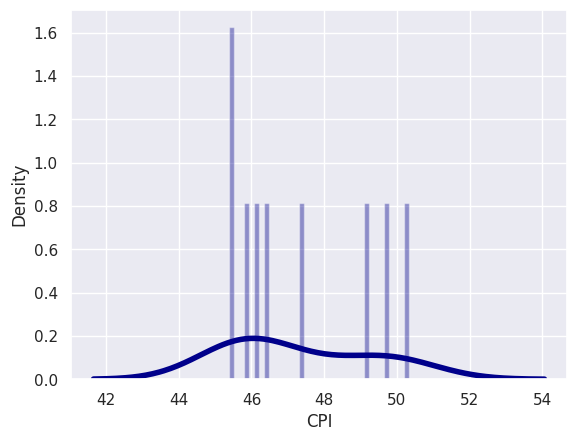

In [ ]:
sns.distplot(data['CPI'], hist=True, kde=True,
             bins=int(180/5), color = 'darkblue',
             kde_kws={'linewidth': 4})

<ipython-input-20-26ab5bc4b26d>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Area'], hist=True, kde=True,


<Axes: xlabel='Area', ylabel='Density'>

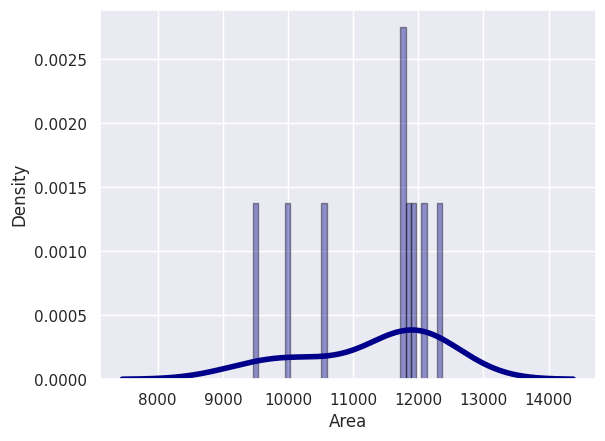

In [ ]:
sns.distplot(data['Area'], hist=True, kde=True,
             bins=int(180/5), color = 'darkblue',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

<ipython-input-21-d98b13c683e0>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Production'], hist=True, kde=True,


<Axes: xlabel='Production', ylabel='Density'>

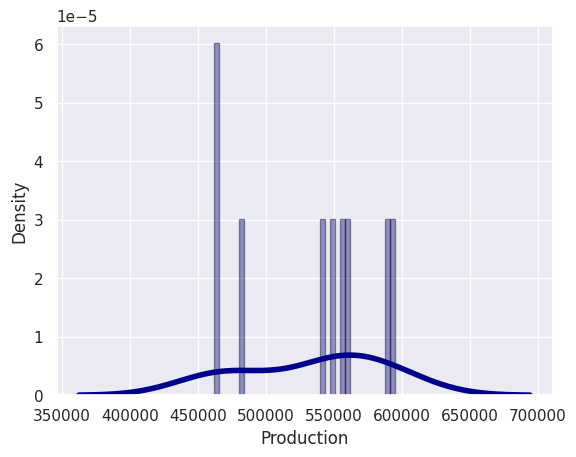

In [ ]:
sns.distplot(data['Production'], hist=True, kde=True,
             bins=int(180/5), color = 'darkblue',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})





<ipython-input-22-c4fc706604ea>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Crop_Year'], hist=True, kde=True,


<Axes: xlabel='Crop_Year', ylabel='Density'>

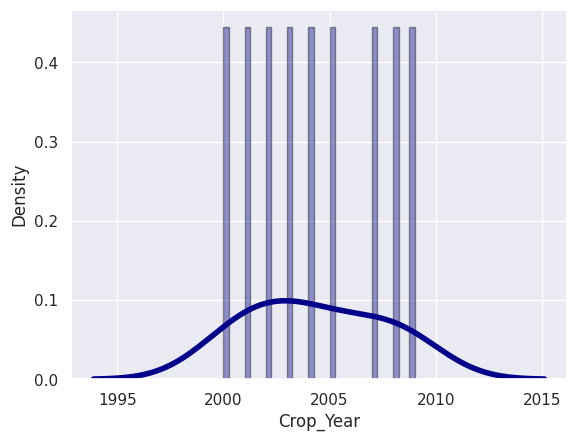

In [ ]:
sns.distplot(data['Crop_Year'], hist=True, kde=True,
             bins=int(180/5), color = 'darkblue',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

# regression model

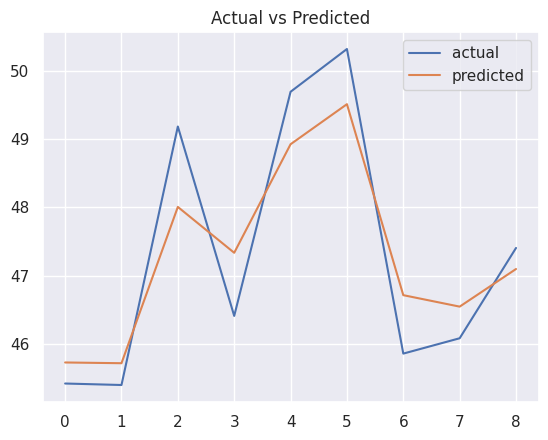

In [ ]:
#actual and predicted values
dm = pd.DataFrame({'Actual': y, 'Predicted': y_pred}).reset_index()
x_axis=dm.index
y_axis=dm.Actual
y1_axis=dm.Predicted
plt.plot(x_axis,y_axis)
plt.plot(x_axis,y1_axis)
plt.title("Actual vs Predicted")
plt.legend(["actual ","predicted"])
b=plt.show()
b